### Stock Market Prediction And Forecasting Using LSTM

In [ ]:
import pandas as pd
import numpy as np
import math
import numpy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from numpy import array
import matplotlib.pyplot as plt

In [ ]:
import time
import datetime

In [ ]:
#Using Yahoo Finance API for downloading the APPL data
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2017, 10, 28, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 12, 27, 23, 59).timetuple()))
interval = '1d' # 1d, 1m
# query from yahoo_Finance_API
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('AAPL_Yahoo.csv') #store APPL data in APLL_Yahoo.csv you can name it XYZ and also download it.

In [ ]:
df=pd.read_csv('AAPL_Yahoo.csv') # Read the .csv File

In [ ]:
df.head() # Display the first five rows of data

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-10-30,40.972500,42.017502,40.930000,41.680000,39.557045,178803200
1,1,2017-10-31,41.974998,42.412498,41.735001,42.259998,40.107506,144187200
2,2,2017-11-01,42.467499,42.485001,41.402500,41.722500,39.597374,134551200
3,3,2017-11-02,41.650002,42.125000,41.320000,42.027500,39.886848,165573600
4,4,2017-11-03,43.500000,43.564999,42.779999,43.125000,40.928440,237594400


In [ ]:
df.tail() # Display the last five Rows of dataFile

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1254,1254,2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
1255,1255,2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300
1256,1256,2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300
1257,1257,2022-10-27,148.070007,149.050003,144.130005,144.800003,144.800003,108284100
1258,1258,2022-10-28,148.199997,157.500000,147.830002,155.869995,155.869995,132431970


In [ ]:
df.drop(df.tail(1).index,inplace=True) # delete the because we required 0 to 1257 rows.

In [ ]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1253,1253,2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700
1254,1254,2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
1255,1255,2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300
1256,1256,2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300
1257,1257,2022-10-27,148.070007,149.050003,144.130005,144.800003,144.800003,108284100


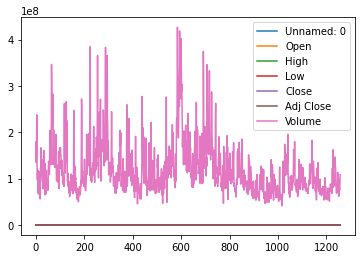

In [ ]:
df.plot()   #plot a graph of all the data.

plt.show()

In [ ]:
df1=df.reset_index()['High'] # Choose the high column for the prdeiction of stock prices.
                              # we can also choose any other value for the prediction of prices.
                              # all the values of high are in the df1

In [ ]:
df1.shape  # Display the shape of data

(1258,)

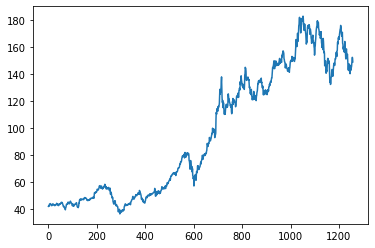

In [ ]:
plt.plot(df1) # Draw a graph for the up and down movements from 2017 to 2022  

In [ ]:
df1 #Display the vaule in  df1

0        42.017502
1        42.412498
2        42.485001
3        42.125000
4        43.564999
           ...    
1253    147.850006
1254    150.229996
1255    152.490005
1256    151.990005
1257    149.050003
Name: High, Length: 1258, dtype: float64

In [ ]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
# Min Max convert the all values in range of 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1258, 1)

In [ ]:
print(df1)

[[0.03813734]
 [0.04083338]
 [0.04132824]
 ...
 [0.79216438]
 [0.78875164]
 [0.76868474]]


In [ ]:
#splitting dataset into train and test split
#Where trainig size of data is 65% and test size of data is 35%
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
# total no of values in training size and test size
training_size,test_size 

(817, 441)

In [ ]:
print(train_data,test_data)

[[0.03813734]
 [0.04083338]
 [0.04132824]
 [0.03887107]
 [0.04869974]
 [0.0499454 ]
 [0.05038905]
 [0.05207836]
 [0.05183948]
 [0.05061089]
 [0.04910928]
 [0.04736877]
 [0.04197667]
 [0.04462152]
 [0.04380247]
 [0.04238618]
 [0.04774417]
 [0.04996246]
 [0.05081564]
 [0.05009897]
 [0.04974062]
 [0.04641321]
 [0.04508225]
 [0.04428025]
 [0.0459013 ]
 [0.0440243 ]
 [0.04177189]
 [0.04218143]
 [0.04313699]
 [0.04636202]
 [0.04550884]
 [0.04747115]
 [0.04677156]
 [0.04854617]
 [0.05371646]
 [0.05062794]
 [0.05067913]
 [0.05170296]
 [0.05067913]
 [0.04393898]
 [0.04276159]
 [0.04458741]
 [0.04243737]
 [0.04535527]
 [0.0491946 ]
 [0.04735172]
 [0.05059381]
 [0.05100334]
 [0.05006483]
 [0.04876801]
 [0.05079859]
 [0.05398949]
 [0.05745342]
 [0.05721452]
 [0.05866495]
 [0.05777763]
 [0.05470616]
 [0.05753874]
 [0.05388711]
 [0.04987713]
 [0.04484335]
 [0.04170364]
 [0.03694286]
 [0.03876869]
 [0.03907582]
 [0.03597025]
 [0.03098765]
 [0.03071463]
 [0.03016858]
 [0.02607331]
 [0.0207665 ]
 [0.03

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 
		dataX.append(a)										# 101 goes to data .append
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
# time_step of data is 100 mean it takes 100 previous values to predict the next value.
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# convert a 2d data into 3d using reshape
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
#Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary() # details of model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the data using batch 64
hist=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 54s 332ms/step - loss: 0.0250 - val_loss: 0.0670
Epoch 2/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0051 - val_loss: 0.0127
Epoch 3/100
12/12 [==============================] - 4s 310ms/step - loss: 0.0015 - val_loss: 0.0102
Epoch 4/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 5/100
12/12 [==============================] - 2s 209ms/step - loss: 9.6483e-04 - val_loss: 0.0029
Epoch 6/100
12/12 [==============================] - 3s 223ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 3s 209ms/step - loss: 9.8357e-04 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 2s 208ms/step - loss: 8.8115e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 3s 226ms/step - loss: 9.0086e-04 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 3s 217ms/step - loss

In [ ]:
#print the keys of dictionary that store the loss
print(hist.history.keys()) 

dict_keys(['loss', 'val_loss'])


In [ ]:
loss = pd.DataFrame(model.history.history)

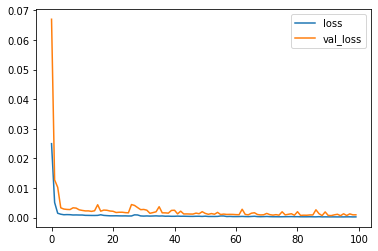

In [ ]:
#plot the losses during training
loss.plot() 

In [ ]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [ ]:
print(train_predict)

[[0.05772993]
 [0.05508232]
 [0.05340521]
 [0.05193628]
 [0.05080083]
 [0.04961014]
 [0.04836315]
 [0.04767104]
 [0.04791645]
 [0.04864378]
 [0.04962264]
 [0.0507782 ]
 [0.05193872]
 [0.05313041]
 [0.05438445]
 [0.05564275]
 [0.05720271]
 [0.05890201]
 [0.059983  ]
 [0.05970569]
 [0.05767775]
 [0.0544483 ]
 [0.05068579]
 [0.04709429]
 [0.04389426]
 [0.0417025 ]
 [0.04082272]
 [0.0422367 ]
 [0.04538277]
 [0.05034619]
 [0.05674766]
 [0.06331958]
 [0.06929879]
 [0.07462373]
 [0.07896084]
 [0.08204493]
 [0.08349524]
 [0.08381432]
 [0.08351128]
 [0.08272931]
 [0.08194648]
 [0.08125685]
 [0.08062761]
 [0.08012241]
 [0.07987826]
 [0.07969983]
 [0.07939678]
 [0.07901807]
 [0.07896376]
 [0.07975255]
 [0.08125234]
 [0.08308642]
 [0.08490205]
 [0.08607039]
 [0.08652923]
 [0.08655478]
 [0.08639342]
 [0.08595042]
 [0.08508953]
 [0.08382912]
 [0.08192916]
 [0.07986447]
 [0.07818168]
 [0.07667623]
 [0.07517935]
 [0.07405154]
 [0.07349038]
 [0.07324526]
 [0.07334453]
 [0.07370222]
 [0.07429881]
 [0.07

In [ ]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
print(test_predict)

[[132.36705]
 [133.00348]
 [133.55226]
 [133.66293]
 [133.88724]
 [134.49551]
 [135.38515]
 [136.10796]
 [137.25336]
 [139.18137]
 [141.38455]
 [142.71983]
 [143.55354]
 [144.0644 ]
 [144.56006]
 [145.4891 ]
 [146.45569]
 [147.0196 ]
 [145.52391]
 [144.3711 ]
 [143.68378]
 [144.11014]
 [145.173  ]
 [146.54253]
 [147.45462]
 [147.1782 ]
 [146.28706]
 [145.38571]
 [145.00372]
 [145.35315]
 [145.88013]
 [146.3115 ]
 [146.33781]
 [146.03279]
 [145.97784]
 [145.79805]
 [146.27713]
 [147.06631]
 [148.2217 ]
 [149.29822]
 [149.6451 ]
 [148.6636 ]
 [147.47966]
 [147.16162]
 [147.61473]
 [148.11676]
 [148.0962 ]
 [147.72424]
 [148.75616]
 [150.00618]
 [151.50002]
 [152.51756]
 [152.87312]
 [153.53484]
 [154.06569]
 [154.00894]
 [153.45851]
 [151.65045]
 [149.74695]
 [148.07458]
 [147.0208 ]
 [146.67072]
 [145.66414]
 [144.63522]
 [144.61145]
 [145.37096]
 [146.36952]
 [146.67178]
 [146.11281]
 [145.20016]
 [144.38841]
 [143.44327]
 [142.4889 ]
 [141.84686]
 [141.5549 ]
 [142.13686]
 [142.96713]

In [ ]:
### Calculate Root Mean Square error performance metrics (RMSE)
rmse=math.sqrt(mean_squared_error(y_train,train_predict))
print(rmse)

74.44578878359725


In [ ]:
### Test Data Root Mean Square error (RMSE)
rmse=math.sqrt(mean_squared_error(ytest,test_predict))
print(rmse)

153.9279516844787


In [ ]:
### Train Data Mean Absolut percentage error (MAPE)
mape = mean_absolute_error(y_train, train_predict)
print(mape)

69.22340689485985


In [ ]:
### Test Data Mean Absolut percentage error (MAPE)
mape = mean_absolute_error(ytest, test_predict)
print(mape)

153.55751482098896


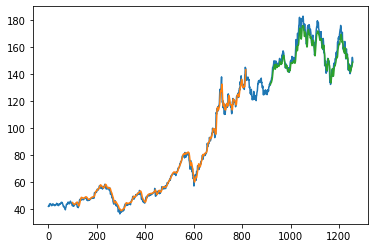

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan #Taking NaN values based on df1 for training.
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan #Taking NaN values based on df1 for testing.
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# where blue one is the actual dataset value,
# Yellow one are the training dataset values
# and Green one are testing values 

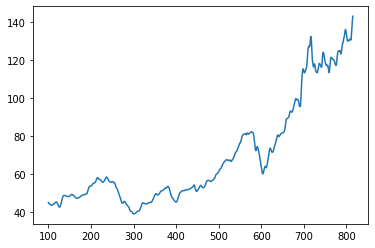

In [ ]:
# Training dataset graph
plt.plot(trainPredictPlot)

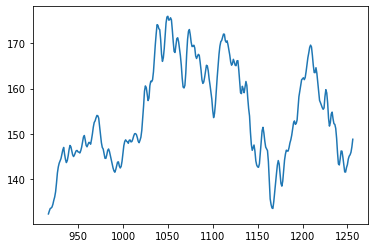

In [ ]:
# Testing dataset graph
plt.plot(testPredictPlot)



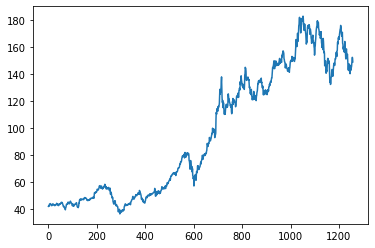

In [ ]:
# Actual dataset graph
plt.plot(scaler.inverse_transform(df1))

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7683434472958373,
 0.7742815743050773,
 0.7611766806200713,
 0.712101519185018,
 0.6741519053422715,
 0.6652105499254584,
 0.6887584098183278,
 0.6549723410692466,
 0.6596819376195219,
 0.6868472911494468,
 0.6916251014725945,
 0.6972902505318376,
 0.7199508740707,
 0.730735127558049,
 0.7302572966997845,
 0.711487247130063,
 0.6957886397407872,
 0.7003616927122834,
 0.7179032118230401,
 0.7350351070229322,
 0.7516210599737758,
 0.7584465325445837,
 0.7522353252032581,
 0.7645894169054752,
 0.7509384717638596,
 0.7680021531908792,
 0.7810388331030125,
 0.7858849595811215,
 0.7835642238268485,
 0.8005596846555227,
 0.8131868498643529,
 0.8180328807858457,
 0.8095692538452086,
 0.7962596028085511,
 0.8251996474616117,
 0.8273155234821443,
 0.8682001451341188,
 0.8679270648020334,
 0.8598730617722605,
 0.8884034825144569,
 0.8924988070097768,
 0.8833527010667848,
 0.8967305727017876,
 0.883147943715133,
 0.9071735320841783,
 0.9184356232552644,
 0.9264896331105095,
 0.9348167164723675,

# Weekly Prediction of Apple stock Market

In [ ]:
# demonstrate prediction for next 7 days

lst_output=[]
n_steps=100
i=0
while(i<7): 
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:     # First this block is run because temp_input is not greater than 100
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        # This else block predict the next day and after this if part execute.
    

print(lst_output)

[0.771786]
101
1 day input [0.77428157 0.76117668 0.71210152 0.67415191 0.66521055 0.68875841
 0.65497234 0.65968194 0.68684729 0.6916251  0.69729025 0.71995087
 0.73073513 0.7302573  0.71148725 0.69578864 0.70036169 0.71790321
 0.73503511 0.75162106 0.75844653 0.75223533 0.76458942 0.75093847
 0.76800215 0.78103883 0.78588496 0.78356422 0.80055968 0.81318685
 0.81803288 0.80956925 0.7962596  0.82519965 0.82731552 0.86820015
 0.86792706 0.85987306 0.88840348 0.89249881 0.8833527  0.89673057
 0.88314794 0.90717353 0.91843562 0.92648963 0.93481672 0.93700092
 0.95365499 0.94512315 0.93720567 0.91072281 0.90287356 0.89877823
 0.91263393 0.91884514 0.86321748 0.86089684 0.84738243 0.83263939
 0.84588082 0.82356149 0.82069481 0.81857893 0.82854416 0.87250012
 0.84710935 0.82362982 0.81093443 0.78438335 0.80629306 0.83031875
 0.83482358 0.80567879 0.78520237 0.80090098 0.80738516 0.77953722
 0.75278138 0.7280732  0.72786844 0.74936864 0.75728622 0.75837821
 0.7280732  0.71981433 0.71612862 0

In [ ]:

day_new=np.arange(1,101) # taking previous 100 days
day_pred=np.arange(101,108)

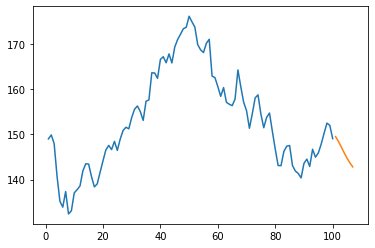

In [ ]:

# total length is 1258  we take values from 1158 because 100(days) values required to predict next(day) value.
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
# Yellow line predicts the next 7 day prediction.

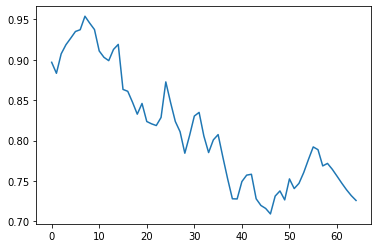

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

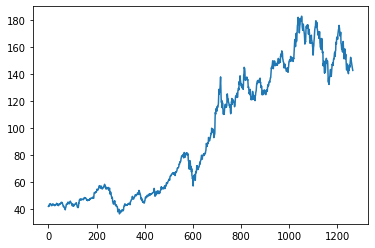

In [ ]:
#full graph is given below:
plt.plot(df3)

# Monthly Prediction of Apple stock Market

In [ ]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30): 
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:     # First this block is run because temp_input is not greater than 100
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        # This else block predict the next day and after this if part execute.
    

print(lst_output)

0 day input [0.65497234 0.65968194 0.68684729 0.6916251  0.69729025 0.71995087
 0.73073513 0.7302573  0.71148725 0.69578864 0.70036169 0.71790321
 0.73503511 0.75162106 0.75844653 0.75223533 0.76458942 0.75093847
 0.76800215 0.78103883 0.78588496 0.78356422 0.80055968 0.81318685
 0.81803288 0.80956925 0.7962596  0.82519965 0.82731552 0.86820015
 0.86792706 0.85987306 0.88840348 0.89249881 0.8833527  0.89673057
 0.88314794 0.90717353 0.91843562 0.92648963 0.93481672 0.93700092
 0.95365499 0.94512315 0.93720567 0.91072281 0.90287356 0.89877823
 0.91263393 0.91884514 0.86321748 0.86089684 0.84738243 0.83263939
 0.84588082 0.82356149 0.82069481 0.81857893 0.82854416 0.87250012
 0.84710935 0.82362982 0.81093443 0.78438335 0.80629306 0.83031875
 0.83482358 0.80567879 0.78520237 0.80090098 0.80738516 0.77953722
 0.75278138 0.7280732  0.72786844 0.74936864 0.75728622 0.75837821
 0.7280732  0.71981433 0.71612862 0.70937137 0.73141761 0.73776536
 0.72670802 0.75264484 0.74070026 0.74711622 0.760

In [ ]:
day_new=np.arange(1,101) # taking previous 100 days
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1258

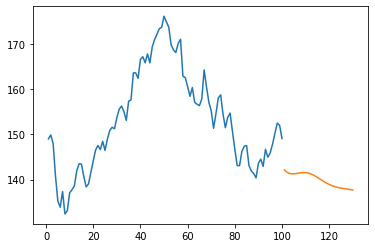

In [ ]:
# total length is 1258  we take values from 1158 because 100(days) values required to predict next(day) value.
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
# Yellow line predicts the next 30 day prediction.

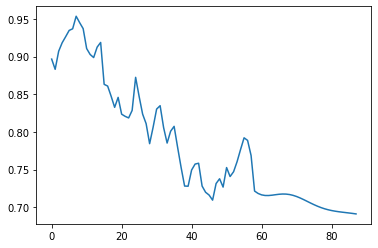

In [ ]:
df4=df1.tolist()
df4.extend(lst_output)
plt.plot(df4[1200:])

#Exend the graph by joining previous and prdicted one and it,s lokks good.

In [ ]:
df4=scaler.inverse_transform(df4).tolist()

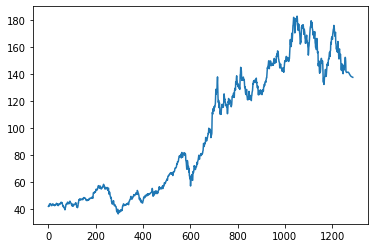

In [ ]:
#full graph is given below:
plt.plot(df4)
